<a href="https://colab.research.google.com/github/mahlegha/CIFAR10_CNN/blob/main/cifar_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import cv2

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]], dtype=uint8)
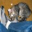

In [ ]:
x_test[0]

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',  'frog', 'horse', 'ship', 'truck']

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
h = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
model.save('model.h5')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3370 - loss: 1.7819 - val_accuracy: 0.5171 - val_loss: 1.3478
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5550 - loss: 1.2467 - val_accuracy: 0.5945 - val_loss: 1.1436
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6238 - loss: 1.0657 - val_accuracy: 0.6239 - val_loss: 1.0506
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6671 - loss: 0.9482 - val_accuracy: 0.6520 - val_loss: 0.9880
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6907 - loss: 0.8814 - val_accuracy: 0.6798 - val_loss: 0.9307
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7154 - loss: 0.8127 - val_accuracy: 0.6773 - val_loss: 0.9162
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7342 - loss: 0.7645 - val_accuracy: 0.6873 - val_loss: 0.9043
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7497 - loss: 0.7214 -

In [ ]:
import cv2

In [ ]:
img = cv2.imread('truck.jpg')

In [ ]:
img.shape

(585, 1170, 3)

In [ ]:
img = cv2.resize(img, (32, 32))

In [ ]:
img.shape

(32, 32, 3)

In [ ]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
img1 = np.array([img1])

In [ ]:
img1.shape

(1, 32, 32, 3)

In [ ]:
img1 = img1 / 255.0

In [ ]:
out1 = model.predict(img1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
out1

array([[ 5.937388 ,  8.464312 , -2.5393453, -2.4973273, -4.5682406,
        -6.8429418, -5.231469 , -3.9213061,  0.6841066, 17.974741 ]],
      dtype=float32)

In [ ]:
model.load_weights('model.h5')

img = cv2.imread('truck.jpg')
img = cv2.resize(img, (32, 32))
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = np.array([img1])
img1 = img1 / 255.0

out1 = model.predict(img1)

m = -1000
idx = -1
o1 = out1[0]
for i in range(len(o1)):
  if o1[i] > m:
    m = o1[i]
    idx = i

print(o1[idx])
print(class_labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
17.974741
truck
